In [52]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Preprocessing Function

In [53]:
import nltk
from nltk.corpus import stopwords

def preprocess(sentence):
    """
    `sentence`를 가져와서, 적합한 word만을 남겨서 리턴
    """
    stop_words = stopwords.words('english')
    word_lst = [w for w in sentence.lower().split() if w not in stop_words]
    return word_lst

# Word2Vec Modelling (From Google)

In [3]:
import gensim.downloader as api
google_model = api.load('word2vec-google-news-300')

In [4]:
import gensim 
import time

if True:
    # LOAD Word2Vec model
    googleNews_filepath = "GoogleNews-vectors-negative300-SLIM.bin.gz"
    start_time = time.time()
    print(f"== LOAD {googleNews_filepath} as word2vec model START")
    GoogleSlimModel = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(
        googleNews_filepath, binary=True
    )

== LOAD GoogleNews-vectors-negative300-SLIM.bin.gz as word2vec model START


# (Optional) Word2Vec Modelling (From 수능지문)


### Creating Corpus

In [5]:
import pandas as pd

In [6]:
df = pd.read_excel("text_data.xlsx")
df.head(2)

,text,#1,#2,#3,#4,#5,answer,연도-번호,Unnamed: 8
0,Imagine that you are in a meeting. Your party ...,의견 교환 시 대화 예절의 중요성,대화를 통한 창의적 사고 신장의 필요성,바람직한 대화를 위한 적극적 태도의 필요성,회의의 효율적 진행을 위한 사회자의 중요성,만족스러운 답변을 얻기 위한 침묵의 효용성,5,10-33,수
1,A forest fire in Brazil affects the weather in...,the connectedness of elements in nature,the importance of light as a food source,the effects of forest fires on the environment,the causes of dramatic changes in the weather,the consequences of the destruction of ecosystems,1,10-34,수


In [7]:
merged_text = ''

for text in list(df['text']):
    merged_text += text
    
merged_text[:600]

'Imagine that you are in a meeting. Your party and the other party are sitting across a table. You ask a question on a particular subject and the answer is unsatisfactory. What would be the best response? It is none at all. So if you are seeking more information or a different kind of information, ask for it by remaining silent. When there is a long pause in the conversation, people feel an overwhelming need to fill it. If someone has finished speaking and you do not play along by taking up your end of the dialog, that person will automatically start to elaborate. Eventually, they may say what '

### Creating Word2Vec Model

In [8]:
# pip install --upgrade gensim

In [9]:
# word list is passed to the Word2Vec class of the gensim.models package
from gensim.models import Word2Vec

In [10]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

merged_text = merged_text.lower() # 텍스트 소문자화
merged_text = re.sub(r'\([^)]*\)', '', merged_text) # 괄호로 닫힌 문자열  제거 Ex) my husband (and myself) for => my husband for
merged_text = re.sub('"','', merged_text) # 쌍따옴표 " 제거
merged_text = ' '.join([contractions[t] if t in contractions else t for t in merged_text.split(" ")]) # 약어 정규화
merged_text = re.sub(r"'s\b","",merged_text) # 소유격 제거. Ex) roland's -> roland
merged_text = re.sub("[^a-zA-Z]", " ", merged_text) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    
# Preparing the dataset
all_sentences = nltk.sent_tokenize(merged_text) # convert our text into sentences

all_words = [nltk.word_tokenize(sent) for sent in all_sentences] # convert sentences into words

# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [11]:
# specify the value for the min_count parameter as 2
# (== include only those words in the Word2Vec model that appear at least twice in the corpus.)
word2vec = Word2Vec(all_words, min_count=2) 
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'imagine': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22978>, 'party': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22400>, 'across': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22390>, 'ask': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB222E8>, 'question': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22048>, 'particular': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB220B8>, 'subject': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB220F0>, 'answer': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22128>, 'would': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22198>, 'best': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB221D0>, 'response': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22208>, 'seeking': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB222B0>, 'information': <gensim.models.keyedvectors.Vocab object at 0x0000022AADB22470>, 'different': <g

### Model Analysis

##### Find vectors for a word

In [12]:
v1 = word2vec.wv['imagine']
v1

array([-4.4116774e-03,  4.2552305e-03,  1.7960931e-03,  3.5964376e-03,
        4.4384492e-03,  3.2792205e-03, -8.5948186e-04, -8.8858418e-04,
        2.1306472e-03, -1.8872106e-03, -1.1010774e-03, -3.4345640e-03,
        2.6029234e-03, -3.5180433e-03, -4.3232688e-03, -3.5011566e-03,
        2.2142131e-03, -1.6221091e-04, -1.6485187e-04,  4.8695137e-03,
       -2.7628108e-03, -2.7900792e-03,  2.6869928e-03,  1.3357032e-03,
        2.2445489e-03,  1.7380714e-03,  2.9037979e-03,  2.3329725e-04,
        2.2375961e-03, -1.2609848e-03, -1.5670956e-03,  3.9301980e-03,
       -2.1255920e-03, -4.4911406e-03, -1.8439618e-03,  1.2692945e-03,
        1.9995195e-03,  3.0987277e-03,  4.4681760e-03,  9.8542497e-04,
        6.2059419e-04, -2.9914528e-03,  9.7645633e-04,  1.2689227e-03,
        4.6415837e-03, -3.1609996e-03, -2.4564532e-03,  3.6395970e-03,
       -4.5031402e-03,  2.6310969e-03, -3.0901036e-03,  2.7307898e-03,
       -4.3371250e-03, -4.8844895e-04,  2.8063781e-03,  1.3379524e-03,
      

##### Finding Similar Words

In [95]:
sim_words = word2vec.wv.most_similar('poor')
sim_words

[('swim', 0.28068527579307556),
 ('small', 0.2777361273765564),
 ('schools', 0.27373430132865906),
 ('keeping', 0.26633694767951965),
 ('perhaps', 0.25922253727912903),
 ('intent', 0.25764209032058716),
 ('green', 0.24726128578186035),
 ('set', 0.24547281861305237),
 ('forest', 0.24270275235176086),
 ('easily', 0.23522427678108215)]

# 전략1: TextRank (Text Summarization)
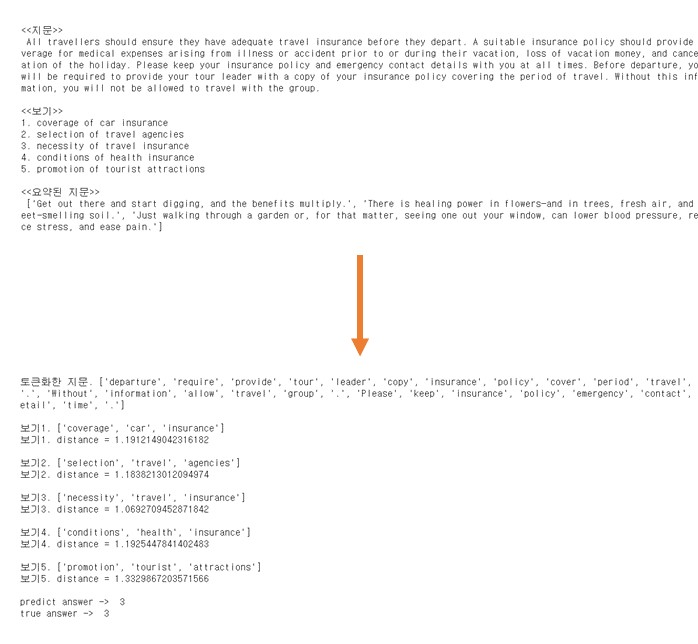

In [48]:
!pip install sumy

In [51]:
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer 

parser = PlaintextParser.from_string(text, Tokenizer("english"))
summary_textRank = TextRankSummarizer()
summary_textRank = summary_textRank(parser.document, 3)

textRankSentence = list()
for sentence in summary_textRank:
    sentence = str(sentence)
    textRankSentence.append(sentence)
    
textRankSentence

["It wouldn't tell people what your friend is really like―the habits, feelings, all the little peculiarities that make this person what he or she is and different from everyone else.",
 'You would find it very difficult indeed to describe the inside of your friend, even though you feel you know such a great friend through and through.',
 'Now good poetry does describe life in that way; it tells us about its inside as well as its outside, and thus it helps you to know and love the world as intimately as you know and love a friend.']

# Word Mover's Distance(WMD)
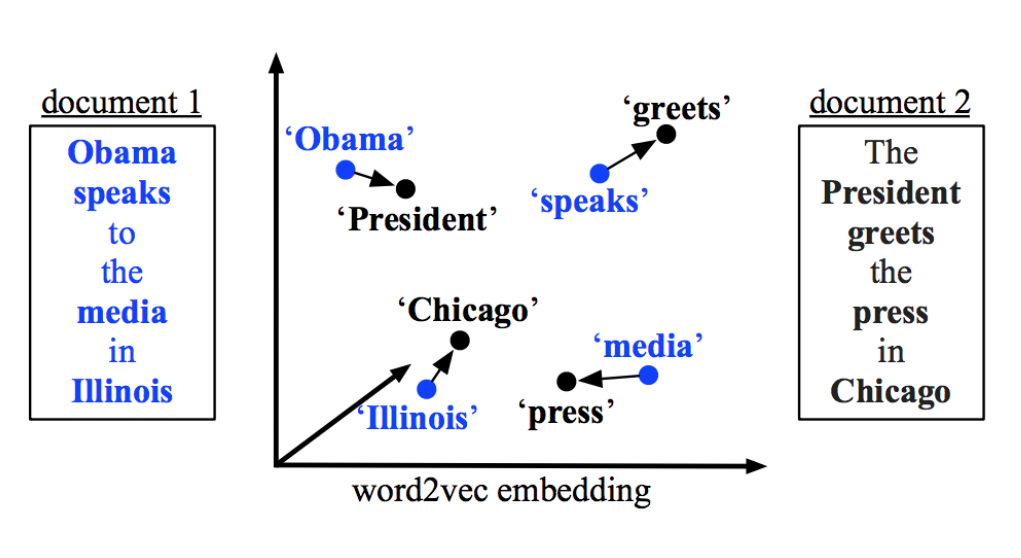

##### Example

In [14]:
sentence_a = 'Obama speaks to the media in Illinois'
sentence_b = 'The president greets the press in Chicago'

print(preprocess(sentence_a))
print(preprocess(sentence_b))

['obama', 'speaks', 'media', 'illinois']
['president', 'greets', 'press', 'chicago']


In [15]:
google_distance = google_model.wmdistance(sentence_a, sentence_b)
print('google distance = %.4f' % google_distance)

google distance = 1.2129


In [16]:
googleslim_distance = GoogleSlimModel.wmdistance(sentence_a, sentence_b)
print('googleslim distance = %.4f' % googleslim_distance)

googleslim distance = 0.4438


In [17]:
my_distance = word2vec.wmdistance(sentence_a, sentence_b)
print('my distance = %.4f' % my_distance)

my distance = 0.0000


C:\Users\huhjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wmdistance` (Method will be removed in 4.0.0, use self.wv.wmdistance() instead).
  """Entry point for launching an IPython kernel.


### 수능 영어 기출 문제

##### Dataframe Preprocessing

In [54]:
import pandas as pd

df = pd.read_excel("text_data.xlsx")
df.head(2)

,text,#1,#2,#3,#4,#5,answer,연도-번호,Unnamed: 8
0,Imagine that you are in a meeting. Your party ...,의견 교환 시 대화 예절의 중요성,대화를 통한 창의적 사고 신장의 필요성,바람직한 대화를 위한 적극적 태도의 필요성,회의의 효율적 진행을 위한 사회자의 중요성,만족스러운 답변을 얻기 위한 침묵의 효용성,5,10-33,수
1,A forest fire in Brazil affects the weather in...,the connectedness of elements in nature,the importance of light as a food source,the effects of forest fires on the environment,the causes of dramatic changes in the weather,the consequences of the destruction of ecosystems,1,10-34,수


In [55]:
import numpy as np

df= df.replace(np.NaN, '무시')

In [56]:
import re

index_list = []

reg=re.compile(r'[a-zA-Z]')

for i in range(len(df)):
    data = df['#2'][i]
    matchObj=reg.match(data)
    if matchObj: 
        index_list.append(i)
    else:
        pass

print(index_list)

[1, 3, 4, 6, 8, 11, 13, 14, 17, 18, 21, 26, 27, 28, 29, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 65, 67, 76, 77, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]


In [57]:
def n_most_frequent(List, n): 
    counter = 0
    most_freq_word_list = []
    
    for i in range(n):
        for word in List: 
            curr_frequency = List.count(word) 
            if(curr_frequency > counter): 
                counter = curr_frequency 
                num = word
        most_freq_word_list.append(num)
        List = [i for i in List if i != num]

        counter = 0

    return most_freq_word_list

##### Predicting Answer using WMD

###### Google Slim Model

In [22]:
import heapq

세 가지 조건을 고려하여 1,2,3순위 정답 유추:
<br>(1) 본문과 보기의 유사도
<br>(2) 보기들 간의 유사도
<br>(3) 본문에서 가장 많이 등장하는 단어 2개를 보기가 포함하였는지 여부
<br>(정답률 59% - 73% - 84%)

In [36]:
correct_num=0       #정답횟수
generous_correct_num = 0
more_generous_correct_num = 0

for i in index_list:
    index_property =list(df.loc[i])
    print('============{}============'.format(index_property[7]))
    sentence_paragraph = preprocess(index_property[0])  #텍스트 본문을 단어정리
    common_words = ['.','get']
    word_list = [i for i in sentence_paragraph if i not in common_words]
    top_2_words = n_most_frequent(word_list,2)
    print('top two most frequent words in article are : {}'.format(top_2_words))

    pick=[0, 100]                                            #wmdistance값이 100을 넘지 않는다는 전제하에 INF대신 100을 넣어줌   
    distance_list = [0,0,0,0,0]
    for i in range(1,6):                                     #보기문제들을 돌아가면서 단어정리 및 wmdistance로 각 문제가 텍스트 본문 단어정리한 것 과 얼마나 거리가 나는지 구함
        j_sum=0                                              #각 보기 단어들의 similarity 값의 합
        sentence = preprocess(index_property[i])
        
        distance = GoogleSlimModel.wmdistance(sentence_paragraph, sentence) #각 보기마다 wmdistance 측정
        distance_list[i-1] = distance
         
    top_three_similarity_index = [0,0,0]
    x = 0
    
    for num in heapq.nsmallest(3, distance_list):
        top_three_similarity_index[x] = distance_list.index(num)
        x += 1
    
    sum_list = [i * 3 for i in distance_list]
    #sum_list = [0,0,0,0,0]
    prev_sum_list = [i for i in sum_list]
    for i in range(5):
        if i in top_three_similarity_index:
            for j in range(5):
                sum_list[i] +=  GoogleSlimModel.wmdistance(preprocess(index_property[i+1]), preprocess(index_property[j+1]))
            prev_sum_list[i] = sum_list[i]
            sum_list[i] +=  GoogleSlimModel.wmdistance(top_2_words, preprocess(index_property[i+1]))
        else:
            sum_list[i] = 100

    print('among choices : {}'.format(prev_sum_list))      
    print('w/ top2words : {}'.format(sum_list))
    
    answer_list = [0,0,0]
    x=0
    for num in heapq.nsmallest(3, sum_list):
        answer_list[x] = sum_list.index(num) + 1
        x += 1
    
    answer_pick1 = answer_list[0]
    answer_pick2 = answer_list[1]
    answer_pick3 = answer_list[2]
    answer= index_property[6]

    if answer_pick1 == answer:
        print(f'{answer_pick1}번, 정답입니다.')
        correct_num+=1
    elif answer_pick2 == answer:
        print(f'{answer_pick1}번, 땡입니다.')
        print(f'재시도 {answer_pick2}번, 정답입니다.')
        generous_correct_num+=1
    elif answer_pick3 == answer:
        print(f'{answer_pick1}번, 땡입니다.')
        print(f'재시도 {answer_pick2}번, 땡입니다.')
        print(f'마지막 시도 {answer_pick3}번, 정답입니다.')
        more_generous_correct_num+=1
    else: 
        print(f'{answer_pick1}번, 땡입니다.')
        print(f'재시도 {answer_pick2}번, 땡입니다.')
        print(f'마지막 시도 {answer_pick3}번, 땡입니다. 정답은 {answer}입니다')

============10-34============
top two most frequent words in article are : ['light', 'every']
among choices : [8.70476254603069, 8.592025629555229, 8.651677917395137, 3.7569347865065486, 3.8473710473452165]
w/ top2words : [10.020073508095317, 9.608118846819405, 9.98632508615961, 100, 100]
2번, 땡입니다.
재시도 3번, 땡입니다.
마지막 시도 1번, 정답입니다.
============09-33============
top two most frequent words in article are : ['people', 'important.']
among choices : [8.445811495918594, 8.245792730611377, 3.847672243705161, 8.122645630620328, 3.764409351621586]
w/ top2words : [9.782862492723279, 9.58094007426787, 100, 9.430524775885537, 100]
4번, 땡입니다.
재시도 2번, 땡입니다.
마지막 시도 1번, 정답입니다.
============08-33============
top two most frequent words in article are : ['healing', 'patients']
among choices : [3.8171008124665367, 3.7697316677311505, 8.708330654770565, 8.773520106287913, 8.839673087226624]
w/ top2words : [100, 100, 9.580385449660607, 10.046217763062758, 10.061619719230253]
3번, 정답입니다.
============07-00======

among choices : [7.869428306723055, 3.688582246436947, 3.778717422662505, 8.242731660003795, 7.217562319687205]
w/ top2words : [9.122961082669743, 100, 100, 9.353562102794923, 8.391598177994704]
5번, 정답입니다.
============14-24============
top two most frequent words in article are : ['scientists', 'nutrients']
among choices : [3.6243970228677167, 3.4757108298092163, 8.022723257137214, 8.333558431013744, 7.9414804244389385]
w/ top2words : [100, 100, 9.123304960331815, 9.532563605300233, 9.076682630497604]
5번, 땡입니다.
재시도 3번, 정답입니다.
============14-24============
top two most frequent words in article are : ['new', 'environment']
among choices : [8.161550849177486, 8.295365244702788, 3.7953464767716203, 3.774586175139592, 8.07521076954976]
w/ top2words : [9.417906141754575, 9.617258830015006, 100, 100, 9.28727371109549]
5번, 땡입니다.
재시도 1번, 땡입니다.
마지막 시도 2번, 땡입니다. 정답은 3입니다
============13-37============
top two most frequent words in article are : ['muscle', 'slow']
among choices : [7.8240535301356

among choices : [8.650594672027543, 8.981350489079055, 3.906271400728017, 8.498491557397077, 3.9285114776535153]
w/ top2words : [9.626804440313592, 10.233568589013217, 100, 9.503632690659032, 100]
4번, 정답입니다.
============무시============
top two most frequent words in article are : ['backpacks', 'shoulder']
among choices : [8.023943448345038, 3.5135174717873197, 3.4935639692458214, 8.107371395982993, 7.676965998974365]
w/ top2words : [9.189750106017414, 100, 100, 9.0637938165694, 8.726354415277523]
5번, 땡입니다.
재시도 4번, 땡입니다.
마지막 시도 1번, 땡입니다. 정답은 2입니다
============무시============
top two most frequent words in article are : ['coffee', 'risk']
among choices : [7.262149666598766, 3.78326971105047, 7.196936253369707, 7.531524856914379, 3.590250317828817]
w/ top2words : [8.165985848557472, 100, 8.054531621316402, 8.42738557919739, 100]
3번, 땡입니다.
재시도 1번, 정답입니다.
============무시============
top two most frequent words in article are : ['tears', 'caused']
among choices : [8.116512458342507, 8.1150204507

In [37]:
avg_score = round(correct_num/len(index_list),2) *100
generous_avg_score = round((correct_num+generous_correct_num)/len(index_list),2) *100
more_generous_avg_score = round((correct_num+generous_correct_num+more_generous_correct_num)/len(index_list),2) *100
print(f'정답률은 {avg_score}%입니다.')
print(f'너그러운 정답률은 {generous_avg_score}%입니다.' )
print(f'더 너그러운 정답률은 {more_generous_avg_score}%입니다.')

정답률은 59.0%입니다.
너그러운 정답률은 73.0%입니다.
더 너그러운 정답률은 84.0%입니다.


# Machine Learning Algorithms

### Creating dataframe

In [58]:
import heapq

df_distance_list = []
df_prev_sum_list = []
df_sum_list = []
df_answer = []

for i in index_list:
    index_property =list(df.loc[i])
    sentence_paragraph = preprocess(index_property[0])
    
    common_words = ['.','get']
    word_list = [i for i in sentence_paragraph if i not in common_words]
    top_2_words = n_most_frequent(word_list,2)
    
    pick=[0, 100]
    distance_list = [0,0,0,0,0]
    for i in range(1,6):
        sentence = preprocess(index_property[i])
        distance = google_model.wmdistance(sentence_paragraph, sentence)
        distance_list[i-1] = distance
        if distance < pick[1]:
            pick[1]=distance
            pick[0]=i
        else:
            pass
        
    top_three_similarity_index = [0,0,0]
    x = 0
    for num in heapq.nsmallest(3, distance_list):
        top_three_similarity_index[x] = distance_list.index(num)
        x += 1
    
    sum_list = [i * 3 for i in distance_list]
    sum_list = [0,0,0,0,0]
    prev_sum_list = [i for i in sum_list]
    for i in range(5):
        if i in top_three_similarity_index:
            for j in range(5):
                sum_list[i] += google_model.wmdistance(preprocess(index_property[i+1]), preprocess(index_property[j+1]))
            prev_sum_list[i] = sum_list[i]
            sum_list[i] += google_model.wmdistance(top_2_words, preprocess(index_property[i+1]))
        else:
            sum_list[i] = 100
    
    answer_list = [0,0,0]
    x=0
    for num in heapq.nsmallest(3, sum_list):
        answer_list[x] = sum_list.index(num) + 1
        x += 1
    
    answer_pick1 = answer_list[0]
    answer_pick2 = answer_list[1]
    answer_pick3 = answer_list[2]
    answer= index_property[6]
    
    ## dataframe
    df_distance_list.append(distance_list)
    df_prev_sum_list.append(prev_sum_list)
    df_sum_list.append(sum_list)
    df_answer.append(answer)

In [59]:
df_wmd = pd.DataFrame()

for j in range(5):
    df_simple_list = []
    df_second_list = []
    df_final_list = []
    for i in range(len(df_distance_list)):
        df_simple_list.append(df_distance_list[i][j]) 
        df_second_list.append(df_prev_sum_list[i][j])
        df_final_list.append(df_sum_list[i][j])
    df_wmd['simple wmd_{}'.format(j)] = df_simple_list
    df_wmd['second wmd_{}'.format(j)] = df_second_list
    df_wmd['final wmd_{}'.format(j)] = df_final_list

df_wmd['answer'] = df_answer

df_wmd.head()

,simple wmd_0,second wmd_0,final wmd_0,simple wmd_1,second wmd_1,final wmd_1,simple wmd_2,second wmd_2,final wmd_2,simple wmd_3,second wmd_3,final wmd_3,simple wmd_4,second wmd_4,final wmd_4,answer
0,3.508422,14.362003,17.750272,3.275740,14.469705,17.068480,3.745176,0.000000,100.000000,3.567458,14.659648,18.053229,3.918824,0.00000,100.000000,1
1,3.233294,13.265424,16.531354,3.208345,13.092124,16.330628,3.819825,0.000000,100.000000,3.417872,0.000000,100.000000,3.127619,11.98381,14.948592,1
2,3.400303,14.874768,18.870176,3.493751,0.000000,100.000000,3.433218,15.562175,18.271716,3.391256,15.001117,18.964634,3.477999,0.00000,100.000000,3
3,3.182155,12.446796,14.714738,3.366234,0.000000,100.000000,2.910225,10.908350,13.140894,3.147905,12.144242,14.326506,3.889280,0.00000,100.000000,3
4,3.273119,14.234912,17.412983,3.375427,14.311377,17.397586,3.086897,14.040884,16.915167,3.553377,0.000000,100.000000,3.431780,0.00000,100.000000,1


### preprocessing dataframe

In [60]:
y_data = df_wmd[['answer']]
y_data.head(3)

,answer
0,1
1,1
2,3


In [61]:
X_data = df_wmd.copy()
X_data = X_data.drop(columns=['answer'])
X_data = X_data.reindex(sorted(X_data.columns), axis=1)
X_data.head(3)

,final wmd_0,final wmd_1,final wmd_2,final wmd_3,final wmd_4,second wmd_0,second wmd_1,second wmd_2,second wmd_3,second wmd_4,simple wmd_0,simple wmd_1,simple wmd_2,simple wmd_3,simple wmd_4
0,17.750272,17.068480,100.000000,18.053229,100.000000,14.362003,14.469705,0.000000,14.659648,0.00000,3.508422,3.275740,3.745176,3.567458,3.918824
1,16.531354,16.330628,100.000000,100.000000,14.948592,13.265424,13.092124,0.000000,0.000000,11.98381,3.233294,3.208345,3.819825,3.417872,3.127619
2,18.870176,100.000000,18.271716,18.964634,100.000000,14.874768,0.000000,15.562175,15.001117,0.00000,3.400303,3.493751,3.433218,3.391256,3.477999


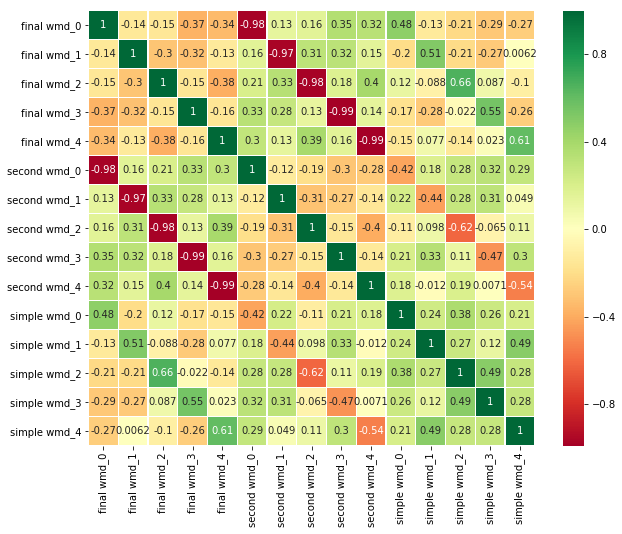

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(X_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [63]:
for i in range(5):
#     del X_data['simple wmd_{}'.format(i)]
    X_data = X_data.drop(columns=['second wmd_{}'.format(i)])
X_data.head(2)

,final wmd_0,final wmd_1,final wmd_2,final wmd_3,final wmd_4,simple wmd_0,simple wmd_1,simple wmd_2,simple wmd_3,simple wmd_4
0,17.750272,17.068480,100.0,18.053229,100.000000,3.508422,3.275740,3.745176,3.567458,3.918824
1,16.531354,16.330628,100.0,100.000000,14.948592,3.233294,3.208345,3.819825,3.417872,3.127619


In [64]:
X_data = X_data.replace([np.inf, -np.inf], 100)
X_data.head(2)

,final wmd_0,final wmd_1,final wmd_2,final wmd_3,final wmd_4,simple wmd_0,simple wmd_1,simple wmd_2,simple wmd_3,simple wmd_4
0,17.750272,17.068480,100.0,18.053229,100.000000,3.508422,3.275740,3.745176,3.567458,3.918824
1,16.531354,16.330628,100.0,100.000000,14.948592,3.233294,3.208345,3.819825,3.417872,3.127619


### Train - Test split

In [65]:
from sklearn.model_selection import train_test_split

trainX ,testX , trainY , testY = train_test_split(X_data,np.ravel(y_data, order="c"),test_size=0.3, random_state = 0)

print(trainX.shape,testX.shape,trainY.shape,testY.shape)

(55, 10) (24, 10) (55,) (24,)


In [66]:
from sklearn.preprocessing import StandardScaler

# standard scale
sc = StandardScaler()
trainX_scaled_s = sc.fit_transform(trainX)
testX_scaled_s = sc.transform(testX)

# min-max scale
min_on_training = trainX.min(axis=0) # 열마다의 최소값 계산
range_on_training = (trainX - min_on_training).max(axis=0) # 분모에 해당 
trainX_scaled_mm = (trainX - min_on_training) / range_on_training # Min-max scaling (0~1)
testX_scaled_mm = (testX- min_on_training) / range_on_training

### Machine Learning Algorithms

In [67]:
from sklearn import metrics

# 모델 함수 만들기
def train_and_test(model): 
    model.fit(trainX, trainY) 
    prediction = model.predict(testX)
    
    print("Accuracy on Training set: {:.3f}".format(model.score(trainX, trainY)))
    print("Accuracy on Test set: {:.3f}".format(model.score(testX, testY)))
    
    print(model.predict(testX))
    print(testY)
    return prediction

def scaled_train_and_test(model): 
    model.fit(trainX_scaled_s, trainY) 
    prediction = model.predict(testX_scaled_s)
    
    print("Accuracy on Training set: {:.3f}".format(model.score(trainX_scaled_s, trainY)))
    print("Accuracy on Test set: {:.3f}".format(model.score(testX_scaled_s, testY)))
    
    print(model.predict(testX_scaled_s))
    print(testY)
    return prediction

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_pred = train_and_test(KNeighborsClassifier(30))
scaled_knn_pred = scaled_train_and_test(KNeighborsClassifier(20))

Accuracy on Training set: 0.309
Accuracy on Test set: 0.333
[1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 5 1 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 0.400
Accuracy on Test set: 0.333
[3 1 5 1 1 1 1 5 4 5 5 1 1 5 1 1 1 1 1 1 5 1 1 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


In [69]:
from sklearn.svm import LinearSVC
clf_pred = train_and_test(LinearSVC(C=0.01))
scaled_clf_pred = scaled_train_and_test(LinearSVC(C=0.01))

Accuracy on Training set: 0.400
Accuracy on Test set: 0.292
[3 5 5 1 5 4 4 5 4 5 5 1 1 5 1 1 1 1 4 4 5 1 1 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 0.527
Accuracy on Test set: 0.417
[5 5 5 1 1 3 4 2 4 5 5 4 1 5 1 1 1 1 4 4 5 1 1 4]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


C:\Users\huhjo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [70]:
from sklearn.linear_model import LogisticRegression
log_pred = train_and_test(LogisticRegression(C=0.1))
scaled_log_pred = scaled_train_and_test(LogisticRegression(C=0.1))

Accuracy on Training set: 0.400
Accuracy on Test set: 0.333
[3 5 5 1 2 4 4 2 4 5 2 1 1 5 1 1 1 1 4 4 5 1 1 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 0.509
Accuracy on Test set: 0.583
[3 3 3 1 1 3 4 2 4 5 5 4 1 5 1 1 1 1 1 1 5 1 1 4]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


C:\Users\huhjo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=0, min_samples_split=3)
forest_predict = train_and_test(forest)
scaled_forest_predict = scaled_train_and_test(forest)

Accuracy on Training set: 1.000
Accuracy on Test set: 0.500
[3 3 5 1 1 3 4 5 4 5 5 4 1 4 1 1 3 2 3 1 5 1 3 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 1.000
Accuracy on Test set: 0.500
[3 3 5 1 1 3 4 5 4 5 5 4 1 4 1 1 3 2 3 1 5 1 3 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(n_estimators=1000000, random_state=0, min_samples_split=3)
forest_predict = train_and_test(forest)
scaled_forest_predict = scaled_train_and_test(forest)

Accuracy on Training set: 1.000
Accuracy on Test set: 0.500
[3 3 5 1 1 3 4 5 4 5 5 4 1 4 1 1 3 2 3 1 5 1 3 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 1.000
Accuracy on Test set: 0.500
[3 3 5 1 1 3 4 5 4 5 5 4 1 4 1 1 3 2 3 1 5 1 3 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


In [73]:
from sklearn.svm import SVC
svc_pred = train_and_test(SVC(kernel='rbf', C=1, gamma=0.0001))
scaled_svc_pred = scaled_train_and_test(SVC(kernel='rbf', C=1, gamma=0.01))

Accuracy on Training set: 0.418
Accuracy on Test set: 0.375
[1 5 5 1 1 1 4 1 1 5 1 1 1 5 1 1 1 1 1 4 5 1 1 5]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 0.309
Accuracy on Test set: 0.250
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb_pred = train_and_test(GaussianNB())
scaled_gnb_pred = scaled_train_and_test(GaussianNB())

Accuracy on Training set: 0.600
Accuracy on Test set: 0.417
[3 3 5 1 1 4 4 5 4 5 5 4 1 5 1 1 1 1 3 4 5 1 1 4]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]
Accuracy on Training set: 0.600
Accuracy on Test set: 0.417
[3 3 5 1 1 4 4 5 4 5 5 4 1 5 1 1 1 1 3 4 5 1 1 4]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1 3 3 1 5 5 4 1 2]


# User-Friendly Model

### Preprocessing function

##### get_user_df : returns calculated wmdistance of test problem for ML models

In [75]:
def get_user_df(text, choices):
    user_df = pd.DataFrame()
    
    sentence_paragraph = preprocess(text)

    common_words = ['.','get']
    word_list = [i for i in sentence_paragraph if i not in common_words]
    top_2_words = n_most_frequent(word_list,2)
    print('top two most frequent words in article are : {}'.format(top_2_words))

    distance_list = [0,0,0,0,0]
    for idx in range(5):
        sentence = preprocess(choices[idx])
        distance = GoogleSlimModel.wmdistance(sentence_paragraph, sentence)
        user_df['simple wmd_{}'.format(idx)] = [distance]
        distance_list[idx] = distance

    top_three_similarity_index = [0,0,0]
    x = 0
    for num in heapq.nsmallest(3, distance_list):
        top_three_similarity_index[x] = distance_list.index(num)
        x += 1

    sum_list = [0,0,0,0,0]
    prev_sum_list = [i for i in sum_list]

    for i in range(5):
        if i in top_three_similarity_index:
            for j in range(5):
                sum_list[i] += GoogleSlimModel.wmdistance(preprocess(choices[i]), preprocess(choices[j]))
            prev_sum_list[i] = [sum_list[i]]
            sum_list[i] += GoogleSlimModel.wmdistance(top_2_words, preprocess(index_property[i+1]))
            user_df['final wmd_{}'.format(i)] = [sum_list[i]]
        else:
            user_df['final wmd_{}'.format(i)] = [100]

        user_df['second wmd_{}'.format(i)] = prev_sum_list[i]

    return user_df

##### wmdistance_answers : returns top three answers using GoogleSlimModel

In [87]:
def wmdistance_answers(text,choices):
    sentence_paragraph = preprocess(text)  #텍스트 본문을 단어정리
    common_words = ['.','get']
    word_list = [i for i in sentence_paragraph if i not in common_words]
    top_2_words = n_most_frequent(word_list,2)
    
    pick=[0, 100]                                            #wmdistance값이 100을 넘지 않는다는 전제하에 INF대신 100을 넣어줌 
    distance_list = [0,0,0,0,0]
    for i in range(5):                                     #보기문제들을 돌아가면서 단어정리 및 wmdistance로 각 문제가 텍스트 본문 단어정리한 것 과 얼마나 거리가 나는지 구함
        j_sum=0                                              #각 보기 단어들의 similarity 값의 합
        sentence = preprocess(choices[i])

        distance = GoogleSlimModel.wmdistance(sentence_paragraph, sentence) #각 보기마다 wmdistance 측정
        distance_list[i-1] = distance

    top_three_similarity_index = [0,0,0]
    x = 0

    for num in heapq.nsmallest(3, distance_list):
        top_three_similarity_index[x] = distance_list.index(num)
        x += 1

    sum_list = [i * 3 for i in distance_list]
    #sum_list = [0,0,0,0,0]
    prev_sum_list = [i for i in sum_list]
    for i in range(5):
        if i in top_three_similarity_index:
            for j in range(5):
                sum_list[i] +=  GoogleSlimModel.wmdistance(preprocess(index_property[i+1]), preprocess(index_property[j+1]))
            prev_sum_list[i] = sum_list[i]
            sum_list[i] +=  GoogleSlimModel.wmdistance(top_2_words, preprocess(index_property[i+1]))
        else:
            sum_list[i] = 100

    answer_list = [0,0,0]
    x=0
    for num in heapq.nsmallest(3, sum_list):
        answer_list[x] = sum_list.index(num) + 1
        x += 1
    
    return answer_list

### Model Training & Predicting Function

In [81]:
def find_answer_with(model, userX): 
    model.fit(trainX_scaled_s, trainY) 
    userX_scaled_s = sc.transform(userX)
    prediction = model.predict(userX_scaled_s)
    
    return prediction

In [92]:
def get_answer(text, choices, model):
    userX = get_user_df(text, choices)
    userX = userX.reindex(sorted(userX.columns), axis=1)

    for i in range(5):
    #     userX= userX.drop(columns=['simple wmd_{}'.format(i)])
        userX= userX.drop(columns=['second wmd_{}'.format(i)])
    
    answer_list = wmdistance_answers(text, choices)
    
    print('Answer predicted by WMD Model : {}'.format(answer_list))
    print('answer predicted by {} : {}'.format(model, find_answer_with(model,userX)))
    
    return userX

# Completed Program

##### Example Problem

In [89]:
text1 = 'Difficulties arise when we do not think of people and machines as collaborative systems, but assign whatever taskscan be automated to the machines and leave the rest to people.This ends up requiring people to behave in machine-likefashion, in ways that differ from human capabilities. Weexpect people to monitor machines, which means keeping alertfor long periods, something we are bad at. We require peopleto do repeated operations with the extreme precision andaccuracy required by machines, again something we are notgood at. When we divide up the machine and humancomponents of a task in this way, we fail to take advantage ofhuman strengths and capabilities but instead rely upon areaswhere we are genetically, biologically unsuited. Yet, whenpeople fail,they are blamed.'
choices1 = ['difficulties of overcoming human weaknesses to avoid failure',
          'issues of allocating unfit tasks to humans in automated systems',
          'benefits of allowing machines and humans to work together',
          'reasons why humans continue to pursue machine automation',
          'influences of human actions on a machine’s performance']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

trainX ,testX , trainY , testY = train_test_split(X_data,np.ravel(y_data, order="c"),test_size=0.2, random_state = 0)
print(trainX.shape,testX.shape,trainY.shape,testY.shape)

# standard scale
sc = StandardScaler()
trainX_scaled_s = sc.fit_transform(trainX)
testX_scaled_s = sc.transform(testX)

print('==========LogisticRegression(C=0.1)==========')
scaled_train_and_test(LogisticRegression(C=0.1))
print('==========KNeighborsClassifier(30)==========')
scaled_train_and_test(KNeighborsClassifier(30))
print('==========RandomForestClassifier(n_estimators=1000, random_state=0, min_samples_split=3)==========')
scaled_train_and_test(RandomForestClassifier(n_estimators=1000, random_state=0, min_samples_split=3))
print('==========LinearSVC(C=0.01)==========')
scaled_train_and_test(LinearSVC(C=0.01))
print('==========SVC(kernel=\'rbf\', C=1, gamma=0.01)==========')
scaled_train_and_test(SVC(kernel='rbf', C=1, gamma=0.01))
print('==========GaussianNB()==========')
scaled_train_and_test(GaussianNB())

(63, 10) (16, 10) (63,) (16,)
==========LogisticRegression(C=0.1)==========
Accuracy on Training set: 0.476
Accuracy on Test set: 0.625
[3 3 5 1 1 3 4 2 3 5 5 4 1 5 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1]
==========KNeighborsClassifier(30)==========
Accuracy on Training set: 0.413
Accuracy on Test set: 0.375
[1 1 5 1 1 1 1 5 5 5 1 1 1 5 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1]
==========RandomForestClassifier(n_estimators=1000, random_state=0, min_samples_split=3)==========
Accuracy on Training set: 1.000
Accuracy on Test set: 0.625
[3 3 5 1 1 3 4 5 4 5 5 4 1 4 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1]
==========LinearSVC(C=0.01)==========
Accuracy on Training set: 0.460
Accuracy on Test set: 0.562
[3 5 5 1 1 5 4 2 5 5 5 4 1 5 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1]
==========SVC(kernel='rbf', C=1, gamma=0.01)==========
Accuracy on Training set: 0.302
Accuracy on Test set: 0.250
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 3 3 3 1 3 4 2 5 5 1 4 3 4 1 1]
==========GaussianNB()==========
Accuracy on Tr

array([3, 3, 5, 1, 1, 4, 4, 5, 4, 5, 5, 4, 4, 5, 1, 3], dtype=int64)

In [93]:
userX = get_answer(text1, choices1, LogisticRegression(C=0.1))
# get_answer(text1, choices1, KNeighborsClassifier(30))
# get_answer(text1, choices1, RandomForestClassifier(n_estimators=1000, random_state=0, min_samples_split=3))
# get_answer(text1, choices1, LinearSVC(C=0.01))
# get_answer(text1, choices1, SVC(kernel='rbf', C=1, gamma=0.01))
# get_answer(text1, choices1, GaussianNB())
userX

top two most frequent words in article are : ['people', 'machines']
Answer predicted by WMD Model : [2, 3, 1]
answer predicted by LogisticRegression(C=0.1) : [2]


,final wmd_0,final wmd_1,final wmd_2,final wmd_3,final wmd_4,simple wmd_0,simple wmd_1,simple wmd_2,simple wmd_3,simple wmd_4
0,100,5.76077,5.819081,5.759579,100,1.191189,1.173793,1.142085,1.158559,1.254835


In [100]:
text = input("본문을 입력하세요: ")
choices = ['','','','','']
choices[0] = input("1번 보기를 입력하세요: ")
choices[1] = input("2번 보기를 입력하세요: ")
choices[2] = input("3번 보기를 입력하세요: ")
choices[3] = input("4번 보기를 입력하세요: ")
choices[4] = input("5번 보기를 입력하세요: ")
# model = input("ML모델을 입력하세요(GaussianNB, ...): ")

get_answer(text, choices, LogisticRegression())

본문을 입력하세요: Difficulties arise when we do not think of people and machines as collaborative systems, but assign whatever taskscan be automated to the machines and leave the rest to people.This ends up requiring people to behave in machine-likefashion, in ways that differ from human capabilities. Weexpect people to monitor machines, which means keeping alertfor long periods, something we are bad at. We require peopleto do repeated operations with the extreme precision andaccuracy required by machines, again something we are notgood at. When we divide up the machine and humancomponents of a task in this way, we fail to take advantage ofhuman strengths and capabilities but instead rely upon areaswhere we are genetically, biologically unsuited. Yet, whenpeople fail,they are blamed.
1번 보기를 입력하세요: difficulties of overcoming human weaknesses to avoid failure
2번 보기를 입력하세요: issues of allocating unfit tasks to humans in automated systems
3번 보기를 입력하세요: benefits of allowing machines and humans to w

,final wmd_0,final wmd_1,final wmd_2,final wmd_3,final wmd_4,simple wmd_0,simple wmd_1,simple wmd_2,simple wmd_3,simple wmd_4
0,100,5.76077,5.819081,5.759579,100,1.191189,1.173793,1.142085,1.158559,1.254835
